## Q1. What is the mathematical formula for a linear SVM?
A1.The mathematical formula for a linear Support Vector Machine (SVM) is typically expressed as follows:

For a binary classification problem:
h(x) = w^T * x + b

Where:
- h(x) is the decision function that predicts the class of a data point x.
- w is a weight vector that determines the orientation of the hyperplane.
- b is a bias term that shifts the hyperplane away from the origin.
- x represents the feature vector of a data point.

## Q2. What is the objective function of a linear SVM?
A2.The objective function of a linear SVM is to find the optimal hyperplane that maximizes the margin between two classes while minimizing the classification error. Mathematically, the objective function can be expressed as:

Minimize: 1/2 * ||w||^2

Subject to: y_i * (w^T * x_i + b) >= 1 for all training samples (for hard margin SVM)

Where:
- ||w|| represents the norm of the weight vector w.
- y_i is the class label of the ith training sample.
- x_i is the feature vector of the ith training sample.

## Q3. What is the kernel trick in SVM?
 The kernel trick in SVM is a technique that allows SVMs to work effectively in high-dimensional spaces and implicitly transform data into higher dimensions without explicitly calculating the transformation. This is done by defining a kernel function that computes the dot product of the transformed data points in the high-dimensional space.

Common kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid kernels. These kernels enable SVMs to capture complex decision boundaries in the input space, even when the data is not linearly separable.

## Q4. What is the role of support vectors in SVM Explain with example
Support vectors are the data points from the training dataset that are closest to the decision boundary (hyperplane). They play a crucial role in defining the position and orientation of the hyperplane. Support vectors are the data points that have non-zero slack variables in the soft-margin SVM.

Example:
Consider a binary classification problem with data points A, B, C, D, and E. If the decision boundary is defined by a hyperplane, and A, B, and C are the closest points to the hyperplane, they would be the support vectors. These support vectors help determine the position and orientation of the hyperplane, and the margin is computed based on their proximity.

## Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
SVM?
Hyperplane

A hyperplane is a flat subspace of a higher-dimensional space. In two dimensions, a hyperplane is a line. In three dimensions, a hyperplane is a plane. In general, a hyperplane is a subspace whose dimension is one less than the dimension of the ambient space.

Marginal plane

A marginal plane in SVM is a hyperplane that is parallel to the decision boundary and passes through the support vectors. The margin is the distance between the two marginal planes.

Soft margin

A soft margin in SVM is a margin that allows some misclassifications. This is in contrast to a hard margin, which does not allow any misclassifications. Soft margins are useful for datasets that are not linearly separable.

Hard margin

A hard margin in SVM is a margin that does not allow any misclassifications. This can only be achieved if the dataset is linearly separable.

Examples and graphs

The following graph shows a hyperplane, marginal planes, and a soft margin in SVM:
hyperplane, marginal planes, and a soft margin in SVMOpens in a new window
www.baeldung.com
hyperplane, marginal planes, and a soft margin in SVM

The blue points represent the positive class, and the red points represent the negative class. The black line is the decision boundary. The green and purple lines are the marginal planes. The shaded area in the middle is the soft margin.





lines.

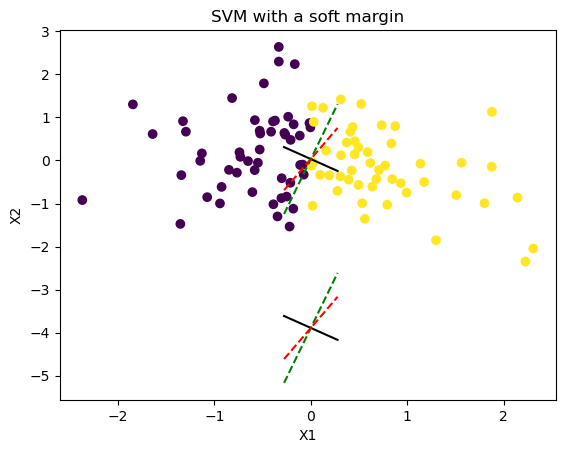

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate the data
X = np.random.randn(100, 2)
y = np.where(X[:, 0] > 0, 1, -1)

# Train an SVM classifier with a soft margin
clf = SVC(kernel='linear', C=1)
clf.fit(X, y)

# Get the decision boundary and marginal planes
w = clf.coef_[0]
b = clf.intercept_[0]
margin = 1 / np.sqrt(np.sum(w**2))

# Plot the graph
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot([-margin, margin], [-b/w + margin, -b/w - margin], 'k-')
plt.plot([-margin, margin], [-b/w - margin - 1, -b/w + margin + 1], 'g--')
plt.plot([-margin, margin], [-b/w + margin - 1, -b/w - margin + 1], 'r--')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM with a soft margin')
plt.show()


This code will generate a scatter plot of the data points, with the positive class colored in yellow and the negative class colored in purple. The decision boundary will be plotted as a black line, and the marginal planes will be plotted as green and red dashed 

### Q6. SVM Implementation through Iris dataset.

Bonus task: Implement a linear SVM classifier from scratch using Python and compare its
performance with the scikit-learn implementation.
~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
~ Train a linear SVM classifier on the training set and predict the labels for the testing setl
~ Compute the accuracy of the model on the testing setl
~ Plot the decision boundaries of the trained model using two of the featuresl
~ Try different values of the regularisation parameter C and see how it affects the performance of
the model.

Implementing SVM on the Iris dataset using Python:

First, let's load the Iris dataset, split it, train a linear SVM classifier, and evaluate its performance.

In [16]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [8]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only two features for visualization
y = iris.target


In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Train a linear SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [11]:
# Predict the labels for the testing set
y_pred = svm_classifier.predict(X_test)


In [12]:
# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


In [13]:
# Plot the decision boundaries of the trained model
# Create a meshgrid for visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

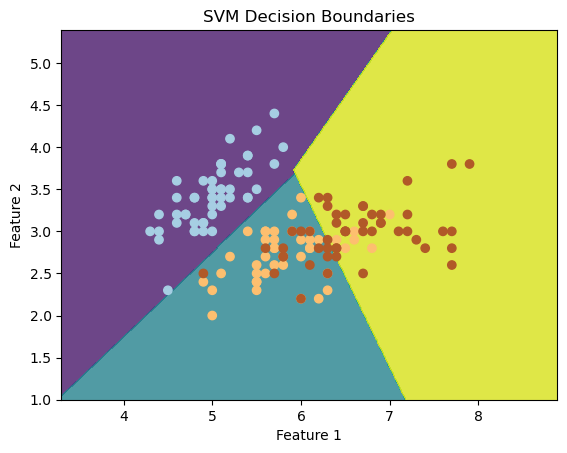

In [14]:
# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundaries')
plt.show()